In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision

import matplotlib.pyplot as plt

Bài 1:

Cho bài toán XOR

Implement thuật toán neural network để giải bài toán dùng Pytorch


In [ ]:
  class XORDataset(Dataset):
    def __init__(self, size= 100):
        super().__init__()
        self.size = size
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        data = torch.randint(low= 0, high= 2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.float32)
        data += 0.1 * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [ ]:
dataset = XORDataset(size=500)

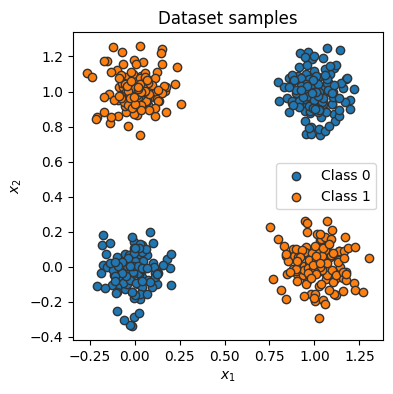

In [ ]:
data = dataset.data.numpy()
label = dataset.label.numpy()
data_0 = data[label == 0]
data_1 = data[label == 1]

plt.figure(figsize=(4,4))
plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
plt.title("Dataset samples")
plt.ylabel(r"$x_2$")
plt.xlabel(r"$x_1$")
plt.legend()


In [ ]:
data_loader = DataLoader(dataset, batch_size= 16, shuffle=True)

In [ ]:
class Neural_Network(nn.Module):
    def __init__(self):
        super(Neural_Network, self).__init__()
        self.linear1 = nn.Linear(2, 10)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [ ]:
model = Neural_Network()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.01)

num_epochs = 100
for epoch in range(num_epochs):
    for data_inputs, data_labels in data_loader:
        preds = model(data_inputs)
        preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

        loss = criterion(preds, data_labels)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 1.6044
Epoch [20/100], Loss: 1.4549
Epoch [30/100], Loss: 5.5472
Epoch [40/100], Loss: 1.4778
Epoch [50/100], Loss: 3.3548
Epoch [60/100], Loss: 1.6473
Epoch [70/100], Loss: 3.4198
Epoch [80/100], Loss: 0.0546
Epoch [90/100], Loss: 1.4189
Epoch [100/100], Loss: 0.0305


Bài 2: 

Cho dataset MNIST

Implement thuật toán neural network với dữ liệu trên sử dụng Pytorch

Chỉnh learning rate, vẽ đồ thị loss tương ứng.

Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test.


In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data',
                                            train=True,
                                            transform= torchvision.transforms.ToTensor() ,download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                            train=False,
                                            transform= torchvision.transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 129364193.24it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 44650089.87it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 35103553.03it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 21747178.96it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
class MNIST_Neural_Network(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MNIST_Neural_Network, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)

        return out

In [ ]:
# Hyper-parameters
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 200
batch_size = 64
learning_rate = 0.001

In [ ]:
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

# Use random_split to split the dataset
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Create DataLoaders for the training and validation sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

learning_rate = 0.001

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = MNIST_Neural_Network(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
n_total_batches = len(train_loader)

batch_loss_list = []
epoch_loss_list = []

for epoch in range(num_epochs):
    model.train()
    current_loss = 0.
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_loss_list.append(loss.item())
        current_loss += loss.item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{n_total_batches}], Loss: {loss.item():.4f}')

    epoch_loss_list.append(current_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}] Total train Cost: {current_loss}')
    print("-" * 45)


Epoch [1/200], Batch [100/750], Loss: 2.2894
Epoch [1/200], Batch [200/750], Loss: 2.2607
Epoch [1/200], Batch [300/750], Loss: 2.2504
Epoch [1/200], Batch [400/750], Loss: 2.2147
Epoch [1/200], Batch [500/750], Loss: 2.2002
Epoch [1/200], Batch [600/750], Loss: 2.1719
Epoch [1/200], Batch [700/750], Loss: 2.1577
Epoch [1/200] Total train Cost: 1672.1589181423187
---------------------------------------------
Epoch [2/200], Batch [100/750], Loss: 2.0974
Epoch [2/200], Batch [200/750], Loss: 2.0930
Epoch [2/200], Batch [300/750], Loss: 2.0578
Epoch [2/200], Batch [400/750], Loss: 2.0316
Epoch [2/200], Batch [500/750], Loss: 2.0418
Epoch [2/200], Batch [600/750], Loss: 1.9430
Epoch [2/200], Batch [700/750], Loss: 1.9123
Epoch [2/200] Total train Cost: 1524.2840538024902
---------------------------------------------
Epoch [3/200], Batch [100/750], Loss: 1.8903
Epoch [3/200], Batch [200/750], Loss: 1.8827
Epoch [3/200], Batch [300/750], Loss: 1.8707
Epoch [3/200], Batch [400/750], Loss: 1.7

Text(0.5, 1.0, 'Epoch Loss')

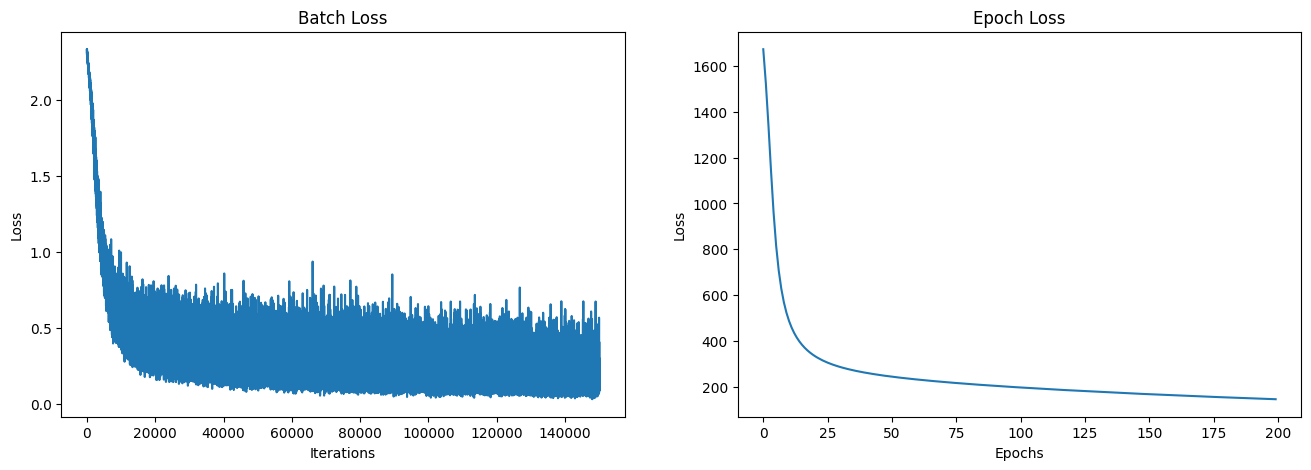

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(range(len(batch_loss_list)), (batch_loss_list), label='Batch Loss')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')
ax[0].set_title('Batch Loss')

ax[1].plot(range(len(epoch_loss_list)), (epoch_loss_list), label='Epoch Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Epoch Loss')

learning_rate = 0.0001

In [ ]:
learning_rate = 0.0001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = MNIST_Neural_Network(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
n_total_batches = len(train_loader)

batch_loss_list = []
epoch_loss_list = []

for epoch in range(num_epochs):
    model.train()
    current_loss = 0.
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_loss_list.append(loss.item())
        current_loss += loss.item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{n_total_batches}], Loss: {loss.item():.4f}')

    epoch_loss_list.append(current_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}] Total train Cost: {current_loss}')
    print("-" * 45)

Epoch [1/200], Batch [100/750], Loss: 2.3105
Epoch [1/200], Batch [200/750], Loss: 2.2986
Epoch [1/200], Batch [300/750], Loss: 2.2859
Epoch [1/200], Batch [400/750], Loss: 2.3065
Epoch [1/200], Batch [500/750], Loss: 2.2982
Epoch [1/200], Batch [600/750], Loss: 2.3112
Epoch [1/200], Batch [700/750], Loss: 2.2836
Epoch [1/200] Total train Cost: 1724.6787598133087
---------------------------------------------
Epoch [2/200], Batch [100/750], Loss: 2.2946
Epoch [2/200], Batch [200/750], Loss: 2.2948
Epoch [2/200], Batch [300/750], Loss: 2.2767
Epoch [2/200], Batch [400/750], Loss: 2.2889
Epoch [2/200], Batch [500/750], Loss: 2.2675
Epoch [2/200], Batch [600/750], Loss: 2.2582
Epoch [2/200], Batch [700/750], Loss: 2.2694
Epoch [2/200] Total train Cost: 1711.416208267212
---------------------------------------------
Epoch [3/200], Batch [100/750], Loss: 2.2894
Epoch [3/200], Batch [200/750], Loss: 2.2682
Epoch [3/200], Batch [300/750], Loss: 2.2662
Epoch [3/200], Batch [400/750], Loss: 2.27

Text(0.5, 1.0, 'Epoch Loss')

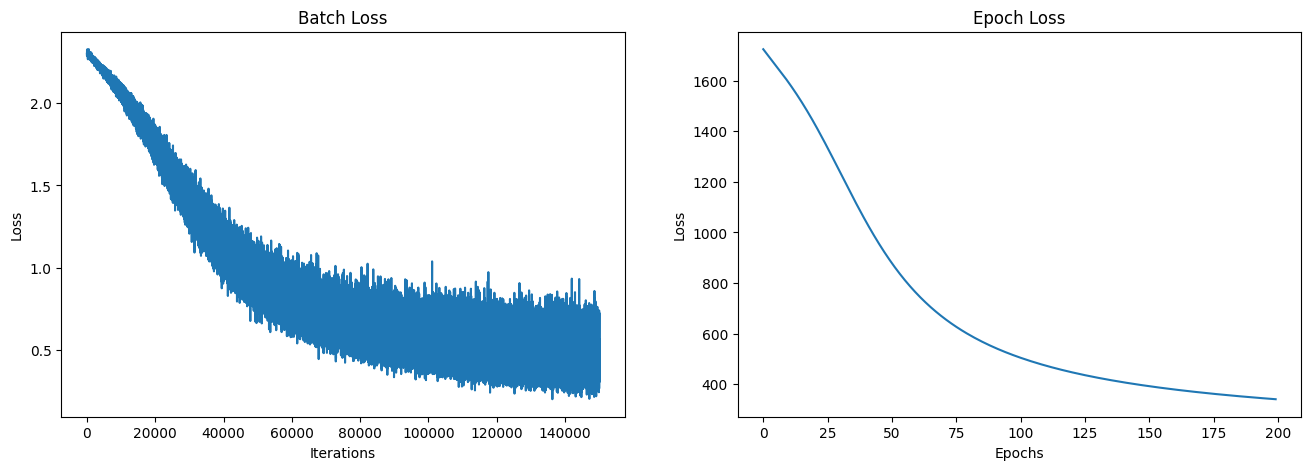

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(range(len(batch_loss_list)), (batch_loss_list), label='Batch Loss')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')
ax[0].set_title('Batch Loss')

ax[1].plot(range(len(epoch_loss_list)), (epoch_loss_list), label='Epoch Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Epoch Loss')

learning_rate = 0.01

In [7]:
learning_rate = 0.01
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = MNIST_Neural_Network(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
n_total_batches = len(train_loader)

batch_loss_list = []
epoch_loss_list = []

for epoch in range(num_epochs):
    model.train()
    current_loss = 0.
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_loss_list.append(loss.item())
        current_loss += loss.item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{n_total_batches}], Loss: {loss.item():.4f}')

    epoch_loss_list.append(current_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}] Total train Cost: {current_loss}')
    print("-" * 45)

Epoch [1/200], Batch [100/750], Loss: 2.0714
Epoch [1/200], Batch [200/750], Loss: 1.7356
Epoch [1/200], Batch [300/750], Loss: 1.4463
Epoch [1/200], Batch [400/750], Loss: 1.1933
Epoch [1/200], Batch [500/750], Loss: 0.7185
Epoch [1/200], Batch [600/750], Loss: 0.7918
Epoch [1/200], Batch [700/750], Loss: 0.7101
Epoch [1/200] Total train Cost: 976.1808027029037
---------------------------------------------
Epoch [2/200], Batch [100/750], Loss: 0.4790
Epoch [2/200], Batch [200/750], Loss: 0.4690
Epoch [2/200], Batch [300/750], Loss: 0.5938
Epoch [2/200], Batch [400/750], Loss: 0.5688
Epoch [2/200], Batch [500/750], Loss: 0.5166
Epoch [2/200], Batch [600/750], Loss: 0.3903
Epoch [2/200], Batch [700/750], Loss: 0.6229
Epoch [2/200] Total train Cost: 402.01770183444023
---------------------------------------------
Epoch [3/200], Batch [100/750], Loss: 0.2907
Epoch [3/200], Batch [200/750], Loss: 0.4174
Epoch [3/200], Batch [300/750], Loss: 0.3955
Epoch [3/200], Batch [400/750], Loss: 0.31

Text(0.5, 1.0, 'Epoch Loss')

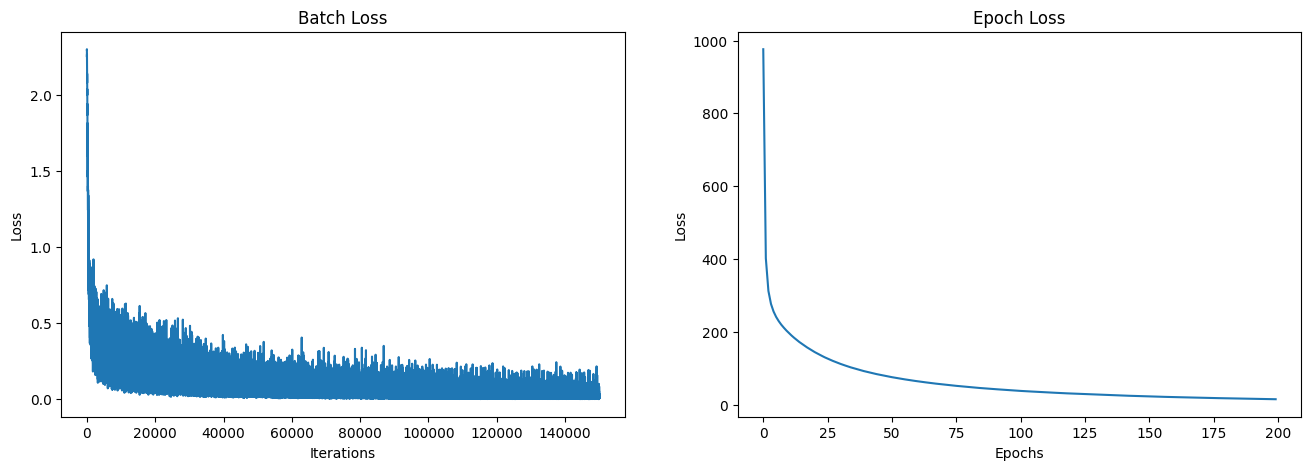

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(range(len(batch_loss_list)), (batch_loss_list), label='Batch Loss')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')
ax[0].set_title('Batch Loss')

ax[1].plot(range(len(epoch_loss_list)), (epoch_loss_list), label='Epoch Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Epoch Loss')

In [ ]:
predictions = []

for i, (images, labels) in enumerate(val_loader):
  # origin shape: [100, 1, 28, 28]
  # resized: [100, 784]
  images = images.reshape(-1, 28*28).to(device)
  labels = labels.to(device)
  with torch.no_grad():
  # Forward pass
    outputs = model(images)
  _, predicted = torch.max(outputs.data, 1)
  predictions.append(predicted)

predictions = torch.cat(predictions, dim=0).to(torch.float64)

In [ ]:
val_labels = []
for i, (images, labels) in enumerate(val_loader):
  val_labels.extend(labels.tolist())
actual_values = torch.tensor(val_labels, dtype=torch.float64).to(device)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
y_true = actual_values.detach().cpu().numpy()
y_pred = predictions.detach().cpu().numpy()

print("Accuracy Score:")
print(accuracy_score(y_true, y_pred))

print("Classification report:")
print(classification_report(y_true, y_pred))

Accuracy Score:
0.9760833333333333
Classification report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1169
         1.0       0.98      0.99      0.99      1328
         2.0       0.97      0.97      0.97      1181
         3.0       0.97      0.97      0.97      1136
         4.0       0.97      0.97      0.97      1217
         5.0       0.98      0.97      0.97      1123
         6.0       0.98      0.99      0.98      1208
         7.0       0.98      0.97      0.98      1269
         8.0       0.98      0.97      0.98      1194
         9.0       0.96      0.97      0.97      1175

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



Bài 3:

Why softmax use exponential instead of numerical number ??


Monotonically increasing — To ensure that larger inputs are mapped to larger outputs.
Non-negative outputs — Because probability values must be non-negative.
The outputs should sum to one — This can be achieved by simply dividing each element of the output by the sum of all elements of the output.
The derivative of exponential is still exponential